In [1]:
import numpy as np
print(f"numpy version {np.__version__}")
import pandas as pd
print(f"pandas version {pd.__version__}")
import seaborn as sns
print(f"seaborn version {sns.__version__}")
import matplotlib.pyplot as plt

numpy version 1.20.1
pandas version 1.2.4
seaborn version 0.11.1


In [2]:
URL = 'https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k'
# Cours de Vanderplas : https://github.com/jakevdp/PythonDataScienceHandbook
# Vidéos de Vanderplas : https://www.youtube.com/watch?v=_ZEWDGpM-vM
# An Introduction to Statistical Learning : http://www-bcf.usc.edu/~gareth/ISL/
# To access an URL from urllib.request import urlretrieve
# to download something : urltrieve(URL,'Filename.Fileformat')

In [3]:
df = pd.read_csv("Fremont.csv")
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [4]:
# To make the 'Date' column the Index column instead of "0, 1, 2, etc."
df = pd.read_csv("Fremont.csv", index_col='Date')
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
11/01/2019 12:00:00 AM,12.0,7.0,5.0
11/01/2019 01:00:00 AM,7.0,0.0,7.0
11/01/2019 02:00:00 AM,1.0,0.0,1.0
11/01/2019 03:00:00 AM,6.0,6.0,0.0
11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [5]:
print(df.index[0])
print(type(df.index[0]))
# The "Date" Index column consists of strings

11/01/2019 12:00:00 AM
<class 'str'>


In [6]:
# To turn the "Date" strings into "real" dates
df = pd.read_csv("Fremont.csv", index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [7]:
print(df.index[0])
print(type(df.index[0]))
# The "Date" Index column consists now of pandas-style dates

2019-11-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


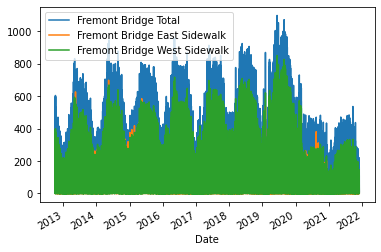

In [8]:
df.plot();
# There are 3 data for each hour of  more than nine years > 9 * 365.25 * 24 *3 = 236_682 data values

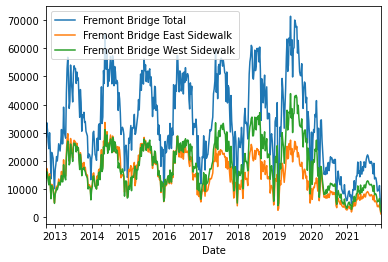

In [9]:
# reducing the data from hour to week by selection and summation : 3*52*9 = 1404 data values
df.resample('W').sum().plot();

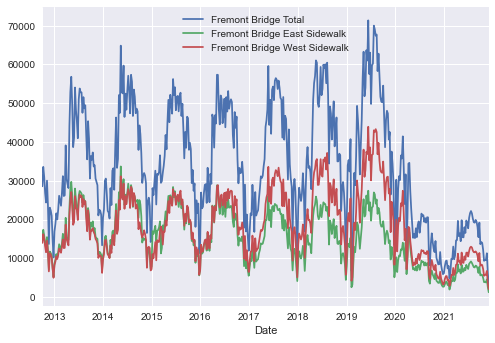

In [10]:
# changing plot style from standard matplotlib.pyplot (plt) to "seaborn" style
plt.style.use('seaborn')
df.resample('W').sum().plot();

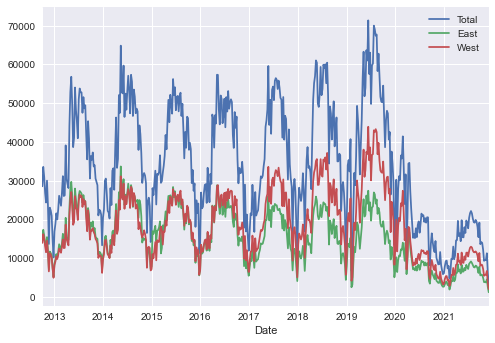

In [11]:
# Changing (shortening) the columns labels
df.columns = ("Total", "East", 'West')
df.resample('W').sum().plot();

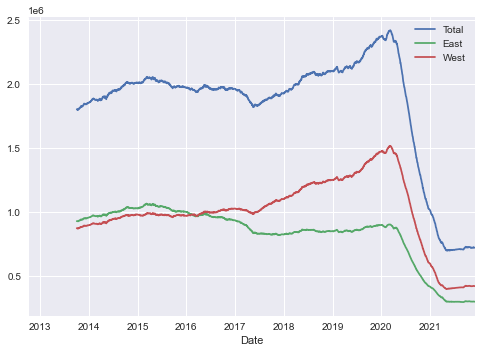

In [12]:
df.resample('D').sum().rolling(365).sum().plot();

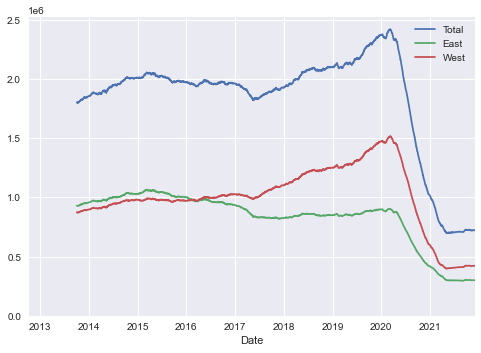

In [13]:
ax = df.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);
# None means "use the current maximum"

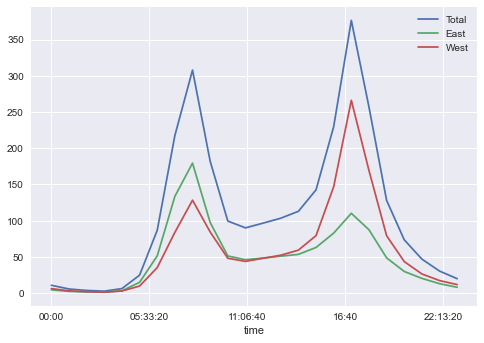

In [14]:
df.groupby(df.index.time).mean().plot();

In [15]:
pivoted = df.pivot_table('Total', index = df.index.time, columns = df.index.date)
pivoted.iloc[:6,:6]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0


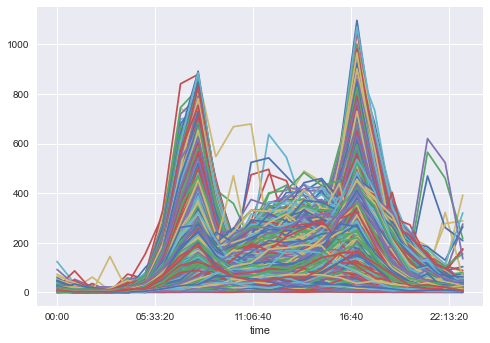

In [16]:
# important : there are so many columns (3387) that it is important to omit legends
pivoted.plot(legend=False);

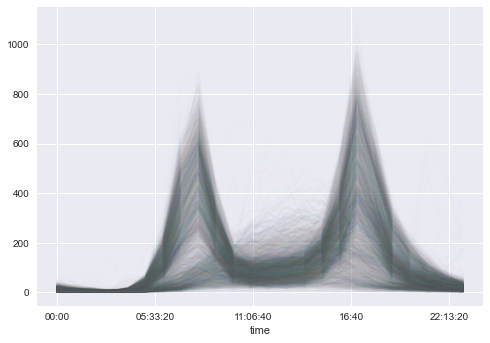

In [17]:
# To see something we introduce some "transparency"
pivoted.plot(legend=False, alpha = 0.01);

In [ ]:
# to save the Jupyter notebook : open google and type github.com in the most upper window
# adressing my zone : https://github.com/Hubert-Flocard/Hubert-Flocard/tree/JupyterWorkfowwVanderplas
# Terminal puis : cd Documents\TechniqueDivers\Python\Vanderplas>